<a href="https://colab.research.google.com/github/Sitananvor/DL_Practice/blob/main/01_Image_Classification_CNN_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.tensorflow.org/tutorials/images/cnn

https://medium.com/@app.kkloft/convolutional-neural-networks-cnn-%E0%B8%AA%E0%B8%A3%E0%B9%89%E0%B8%B2%E0%B8%87-model-%E0%B9%80%E0%B8%9E%E0%B8%B7%E0%B9%88%E0%B8%AD%E0%B8%97%E0%B8%B3-image-classification-%E0%B8%94%E0%B9%89%E0%B8%A7%E0%B8%A2-tensorflow-58173661cfeb

#Import library & modelu

In [ ]:
#import library
import tensorflow as tf   #ใช้ในการสร้างและฝึกโมเดล machine learning
import numpy as np
import matplotlib.pyplot as plt   #ใช้ในการสร้างกราฟและภาพวาดต่างๆ

In [ ]:
#import modelu from library >> for call/access functions and classes in that module
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

# Prepare dataset

## Download and prepare CIFAR10 dataset

In [ ]:
#Download and prepare the CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
#CIFAR-10 dataset สามารถ import จาก keras.datasets
#ชุดข้อมูลรูปภาพที่ใช้ train จะถูกโหลดเข้าไปเก็บในตัวแปร in_train และ out_train และชุดข้อมูลรูปภาพที่ใช้ test จะถูกโหลดเข้าไปเก็บในตัวแปร in_test และ out_test

In [ ]:
type(train_images)

numpy.ndarray

In [ ]:
train_images.shape  #50,000 ภาพ แต่ละภาพมีขนาด 32x32 และเป็นภาพสีซึ่งประกอบด้วยข้อมูล 3 ชุดได้แก่ R, G, B

(50000, 32, 32, 3)

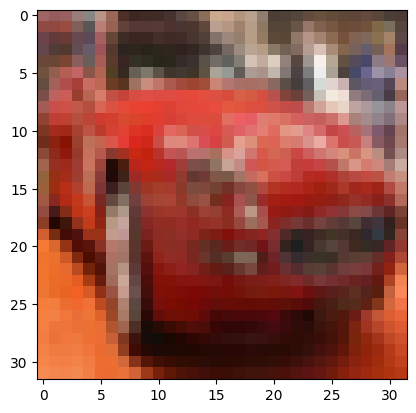

In [ ]:
#ดูภาพที่โหลดเข้ามา
plt.imshow(train_images[5]) #imshow() function : display data as an image; i.e. on a 2D regular raster

## Normalize pixel values to be between 0 and 1

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

1. การลดปัญหาการเรียนรู้: ที่เกิดจากค่าที่มีการกระจายแตกต่างกันมาก โดยเฉพาะในการใช้กับอัลกอริธึมที่ต้องการค่า input ที่มีลักษณะที่เป็นประโยชน์ต่อการเรียนรู้ได้ดี เช่น การเรียนรู้ของโครงข่ายประสาทเทียม (Neural Networks) ที่ใช้ Gradient Descent และเทคนิคการอัปเดตค่า weights ซึ่งต้องการข้อมูล input ที่มีการกระจายและการเปลี่ยนแปลงค่าที่น้อยลงเท่าที่จะทำได้

2. การป้องกันค่าที่ล้นเหลือ: ป้องกันไม่ให้ค่านอกเหนือจากขอบเขตที่รับได้ (clipping) ซึ่งอาจช่วยลดความผิดพลาดในการคำนวณและป้องกันค่าที่ล้นเหลือที่อาจเกิดขึ้นได้ในขั้นตอนการคำนวณ

3. ความสะดวกในการเปรียบเทียบ: การทำให้ค่าอยู่ในช่วงเดียวกันช่วยให้ง่ายต่อการเปรียบเทียบข้อมูลระหว่างกัน โดยเฉพาะเมื่อมีการใช้งานหลายๆ โมเดลหรือเทคนิคในการประมวลผลข้อมูลต่างๆ

In [ ]:
train_images, test_images = train_images/255, test_images/255

In [ ]:
type(train_images)

numpy.ndarray

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
train_images[5]

array([[[0.62352941, 0.4       , 0.39607843],
        [0.58823529, 0.35686275, 0.37254902],
        [0.6       , 0.37254902, 0.38039216],
        ...,
        [0.35686275, 0.27843137, 0.21960784],
        [0.29019608, 0.24705882, 0.21568627],
        [0.29803922, 0.22745098, 0.21568627]],

       [[0.55686275, 0.29411765, 0.26666667],
        [0.57254902, 0.28235294, 0.25882353],
        [0.60784314, 0.29803922, 0.25490196],
        ...,
        [0.49803922, 0.41176471, 0.27843137],
        [0.47843137, 0.43529412, 0.36470588],
        [0.3372549 , 0.27058824, 0.23921569]],

       [[0.42745098, 0.2627451 , 0.29411765],
        [0.38823529, 0.22745098, 0.23529412],
        [0.41176471, 0.23137255, 0.20392157],
        ...,
        [0.5372549 , 0.43921569, 0.31372549],
        [0.63921569, 0.51764706, 0.41176471],
        [0.36470588, 0.28235294, 0.27843137]],

       ...,

       [[0.95686275, 0.50588235, 0.2745098 ],
        [0.94117647, 0.48235294, 0.25490196],
        [0.94509804, 0

In [ ]:
train_labels.shape  #จำนวน 50,000 โดยเป็นข้อมูล 1 มิติ

(50000, 1)

In [ ]:
train_labels[5]     #output มีค่าเป็น 1 ซึ่งเป็นค่าแทนหมวดภาพ รถ นั่นเอง

array([1], dtype=uint8)

## Preprocess Input

สำหรับข้อมูล output ที่เป็นค่าตัวเลขแทนหมวดหมู่นั้น เราต้องทำการแปลงข้อมูลให้อยู่ในรูปแบบ one-hot categorical ซึ่งหมายถึง array ที่มีค่าเป็น 0 ทั้งหมด ยกเว้นตำแหน่งที่ตรงกับตัวเลขเดิมจะมีค่าเป็น 1

วิธีการแปลงรูปแบบข้อมูลให้เป็น one-hot categorical สามารถทำได้โดยใช้ to_categorical จาก tensorflow.keras.utils

In [ ]:
from tensorflow.keras.utils import to_categorical

#ต้องการแปลงข้อมูลให้เป็น one-hot categorical ที่มีค่าทั้งสิ้น 10 หมวด
out_train_labels = to_categorical(train_labels, 10)
out_test_labels = to_categorical(test_labels, 10)

ยกตัวอย่างเช่น ค่า 6 ที่เป็นค่าแทนกบ จะต้องถูกแปลงเป็น array ที่มีค่าเป็น 0 ทั้งหมดยกเว้นตำแหน่งที่ 6 คือ [0, 0, 0, 0, 0, 0, 1, 0, 0. 0]

In [ ]:
train_labels[0]

array([6], dtype=uint8)

In [ ]:
out_train_labels[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Verify the data

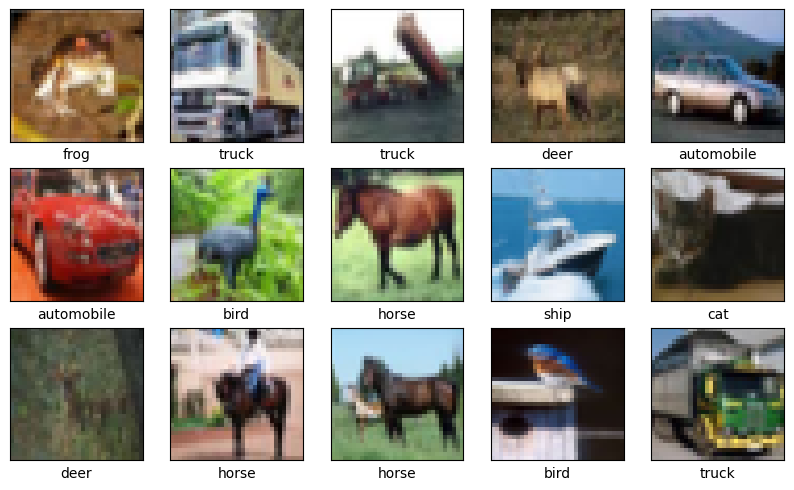

In [ ]:
#To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))  # สร้าง figure ใหม่ขนาด 10x10 นิ้ว ซึ่งเป็นพื้นที่สำหรับการวาดภาพทั้งหมดที่จะแสดง
for i in range(15):
  plt.subplot(5,5,i+1)  #describes the layout of the figure ; 3 arguments is (row, column, index of the current plot)
  plt.xticks([]), plt.yticks([])  #ไม่แสดงแกน x, y
  plt.grid(False)                #ปิดการแสดงเส้นกริดบนภาพ
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])  #The CIFAR labels happen to be arrays, which is why you need the extra index
plt.show()

# Model Creation

Create the convolutional base
These lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument input_shape to your first layer.

- Conv2D layer : จะสร้าง feature map หรือ kernel ที่นำไป apply กับภาพที่เป็น input โดยจะ scan ไปให้ทั่วภาพ
- Pooling layer : ช่วนลดขนาดของ output ที่ได้จาก layer ก่อนหน้าลง โดยคงไว้ซึ่งคุณสมบัติของข้อมูลให้มากที่สุด
- Flatten layer : ทำการแปลงข้อมูล output ที่มีหลายมิติให้เป็น 1 มิติ เพื่อเตรียมข้อมูลให้อยู่ใน format ที่พร้อมสำหรับเป็น input ให้กับ Fully connected Layer
- Dense layer or Fully connected Layer : ข้อมูลจากทุกๆ input จะเชื่อมต่อไปยัง output ทุกๆ node โดยแต่ละการเชื่อมต่อจะคูณด้วย weight ที่ต่างกัน และที่ทุกๆ node (neuron) ของ output จะสามารถกำหนด activation ที่เหมาะสมได้

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

Architecture ของ Model ที่สร้างมี Convolutional Layer และ Pooling Layer สองชุด แล้วตามด้วย Flatten layer และ Dense Layer อีกสองชั้น โดยแต่ละ layer ที่มีคุณสมบัติดังนี้

- Convolutional Layer รองรับ Input เป็นภาพสีขนาด 32x32 ให้ Output ออกมา 32 feature maps โดยมี kernel ขนาด 3x3 และใช้ Activation Function เป็น Rectified Linear Unit
  - Input shape: (32, 32, 3), Kernel size: (3, 3), Padding: valid (ไม่มี ), Stride: ค่าเริ่มต้นคือ (1, 1)
    - Output size = Input size − Kernel size + 1 ; padding = valid
    - Output height, width: 32−3+1=30
> - valid padding: ไม่มีการเพิ่ม padding รอบๆ input image, ทำให้ขนาดของ output เล็กลง
> - same padding: เพิ่ม padding รอบๆ input image ให้ขนาดของ output เท่ากับ input (ในกรณีของ stride = 1)


```
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=(32,32,3), activation='relu'))  
#output  (32, 32, 32) เนื่องจาก padding ถูกเพิ่มให้ input มีขนาดเท่ากับ output:
```
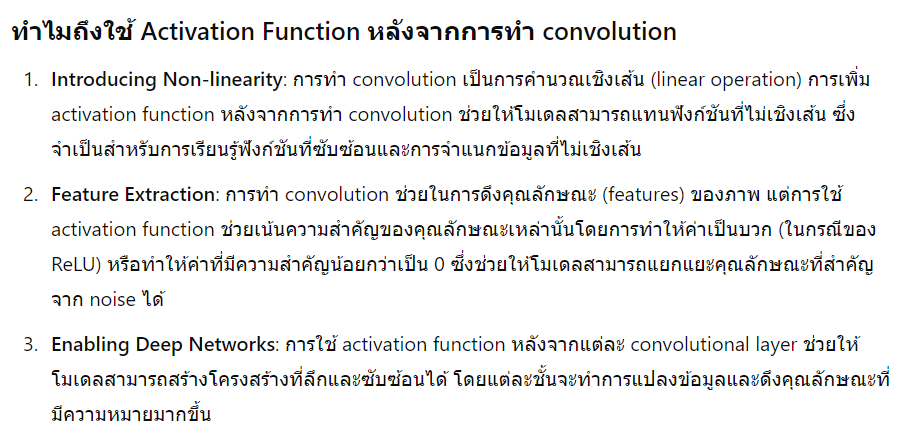
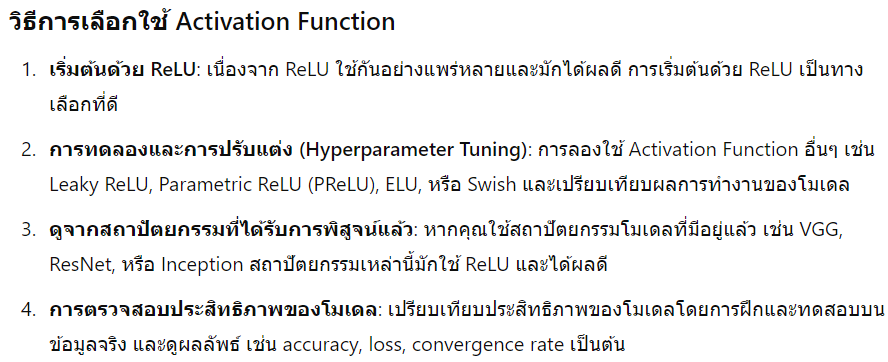
    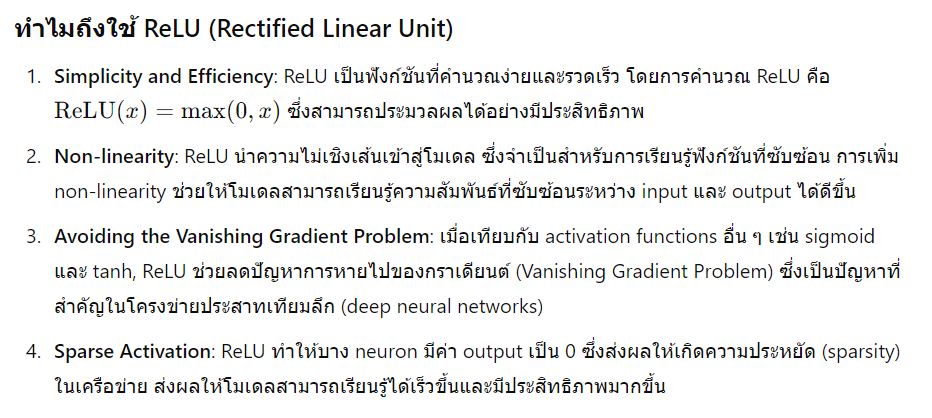

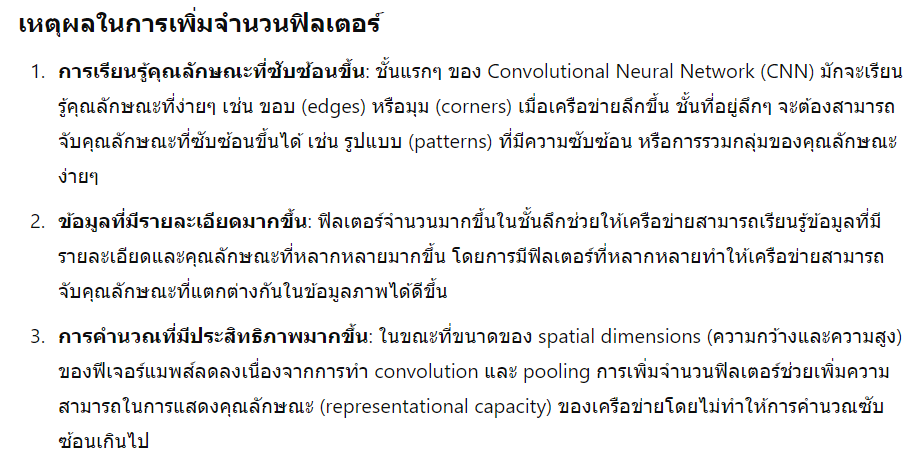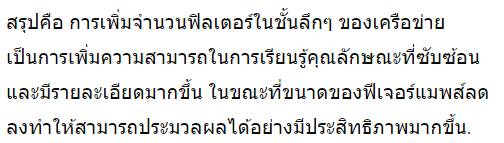

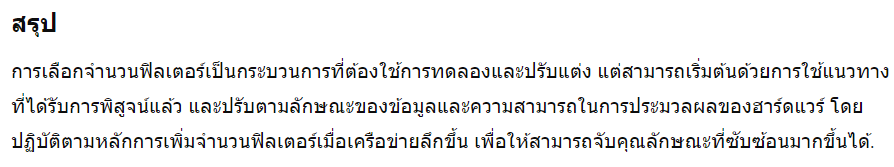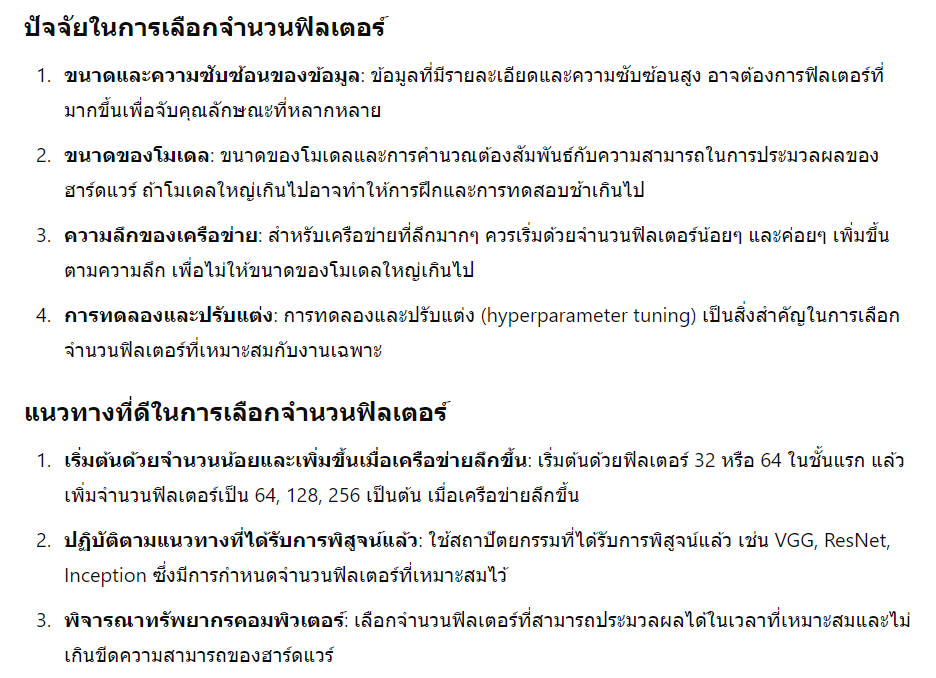

- Pooling Layer ใช้เป็น Max Pool ขนาด 2x2 โดยจะทำการลดขนาด input ลงได้ถึง 1/4
- Flatten layer ที่ทำการแปลงข้อมูล multi dimension ให้เป็น vector
- Dense Layer แรกเป็น Hidden Layer กำหนดให้มีจำนวน output เป็น 256 และใช้ Activation Function เป็น Rectified Linear Unit
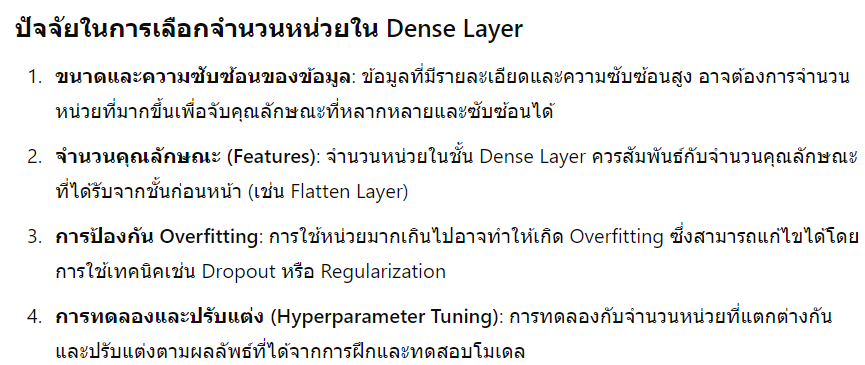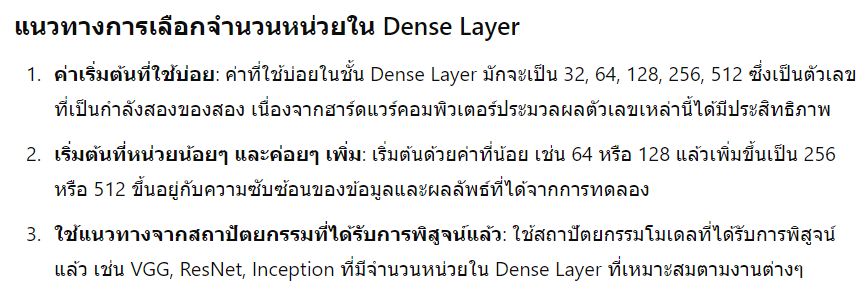

- Dense Layer ที่สองเป็น Output Layer ของ Network เราต้องกำหนดให้มีจำนวน output เท่ากับจำนวนหมวดหมู่ภาพที่เราต้องการจัดแบ่ง ในตัวอย่างคือกำหนดเป็น 10 และเราใช้ Activation Function เป็น Softmax เนื่องจาก Output ของเราเป็น Multi-Class

In [ ]:
# Create Sequential Model
model = models.Sequential()

# Layer 1.1: Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu',)) #ในชั้นแรกใช้ 32 ฟิลเตอร์ เพื่อจับคุณลักษณะพื้นฐานของภาพขนาด 32x32 พิกเซล

# Layer 1.2: Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

# Layer 2.1: Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(32,32,3), activation='relu',)) #ในชั้นที่สองใช้ 64 ฟิลเตอร์ เพื่อจับคุณลักษณะที่ซับซ้อนขึ้นจากข้อมูลฟีเจอร์แมพส์ที่ได้จากชั้นแรก

# Layer 2.2: Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

# Layer 3: Flatten Layer
model.add(Flatten())

# Layer 4: Dense Layer (Hidden Layer)
model.add(Dense(256, activation='relu'))

# Layer 5: Dense Layer (Output Layer)
model.add(Dense(10, activation='softmax'))


In [ ]:
#Let's display the architecture of your model so far:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_4 (Dense)             (None, 256)              

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.



#Loss Function & Optimizer (Compile and train the model)

- Loss Function เอาไว้เลือก model ที่ดีที่สุด ไม่ได้มีไว้เลือกไว้วัดผล model (วัดด้วย matric)
- Matric มีไว้สำหรับตอบโจทย์ว่า model สามารถแก้ปัญหาไรได้

In [ ]:
#config ค่าให้กับ model โดยใช้คำสั่ง compile
model.compile(loss='SparseCategoricalCrossentropy',
              optimizer='adam',
              metrics=['accuracy'])

- Function loss : model จะปรับค่าในขั้นตอนการ training เพื่อลดค่าของ loss นี้
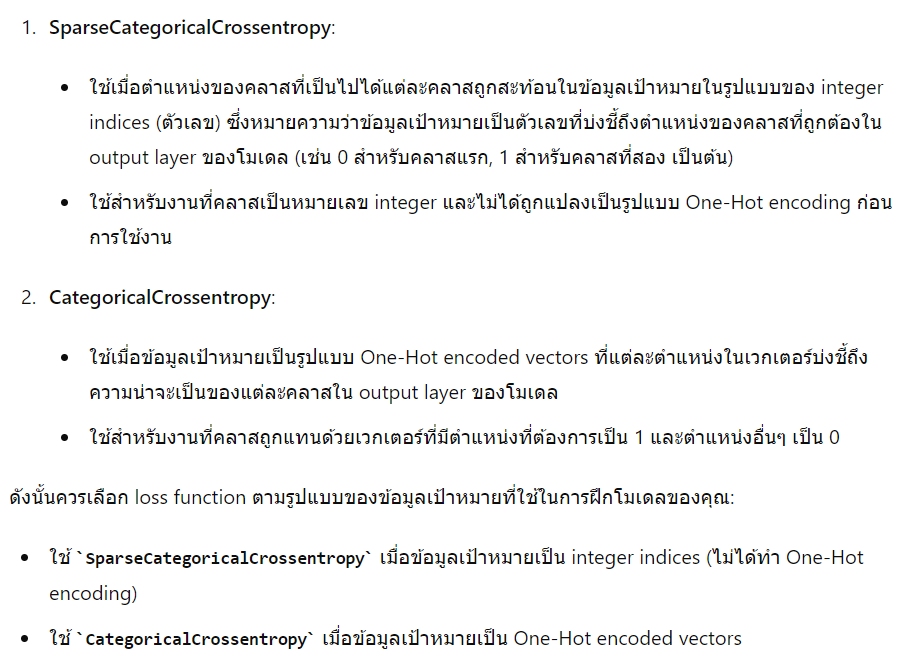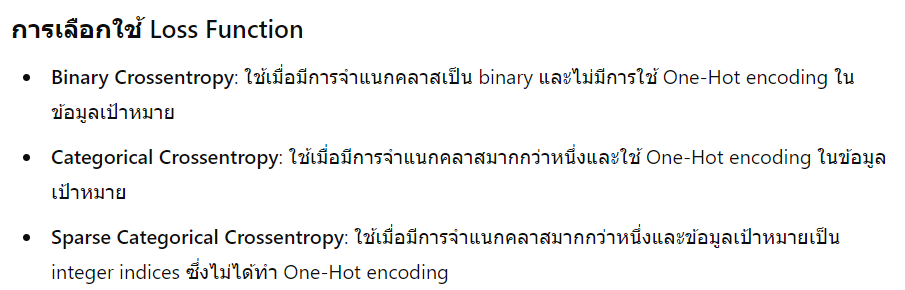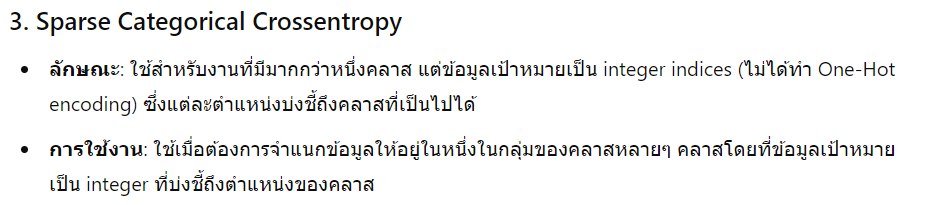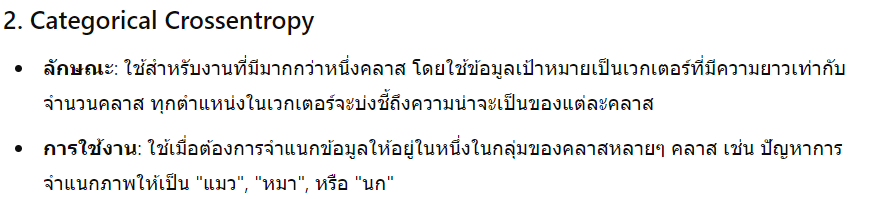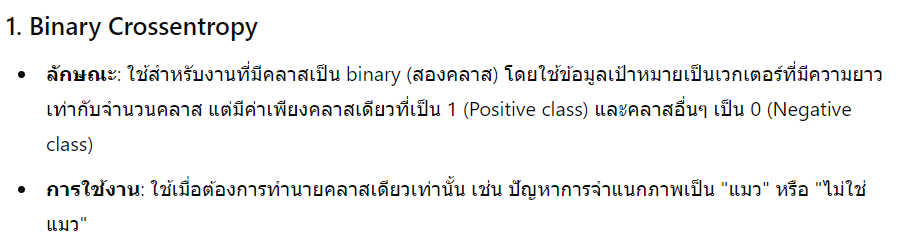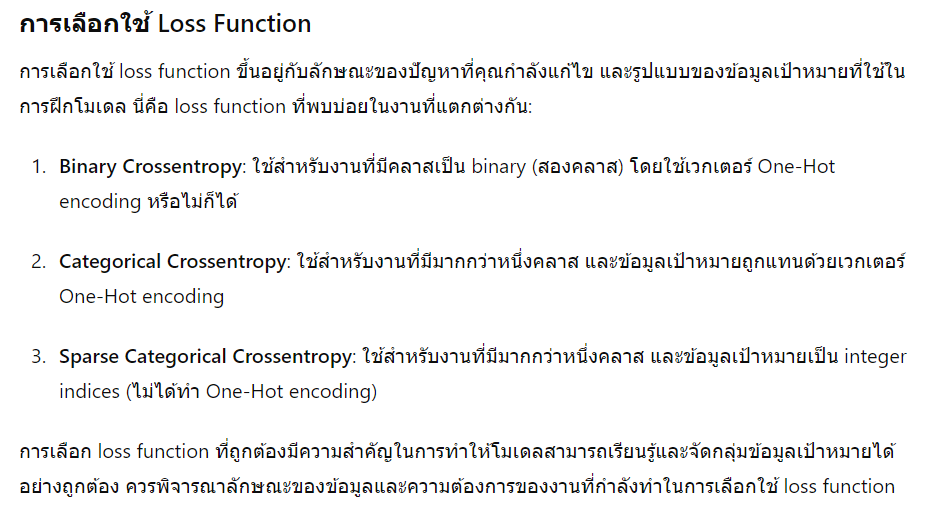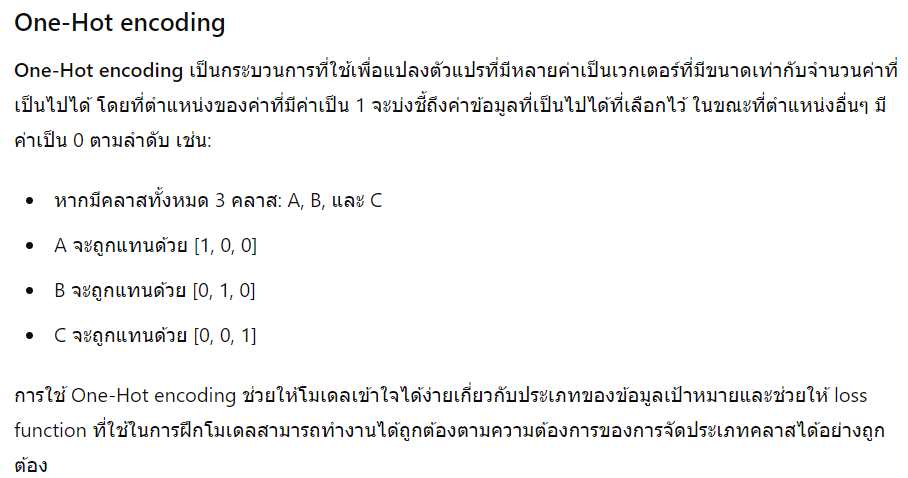

- optimizer : กำหนดให้กับ model โดยระบุเป็นชื่อ optimizer หรือสร้าง optimizer object ก่อนก็ได้ ในตัวอย่างเราเลือกใช้ algorithm adam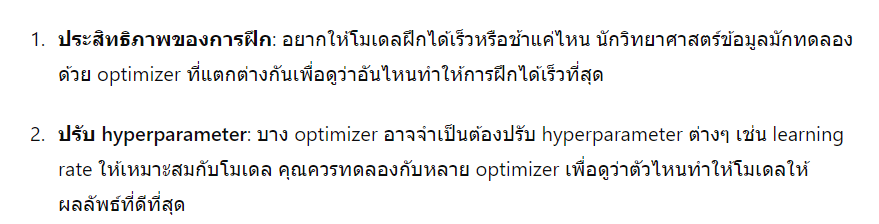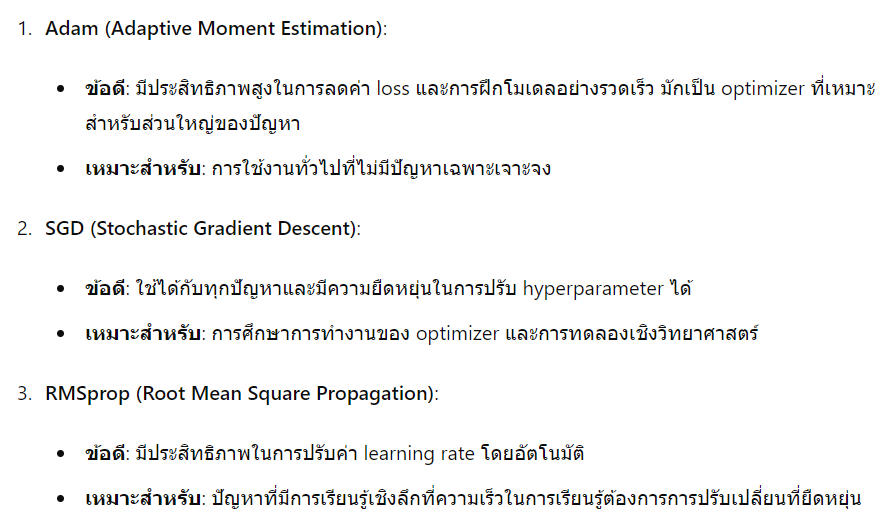


- metrics : ต้องการให้ model ทำการคำนวณในระหว่าง training และ testing โดย metric ที่มักจะระบุเพิ่มคือ accuracy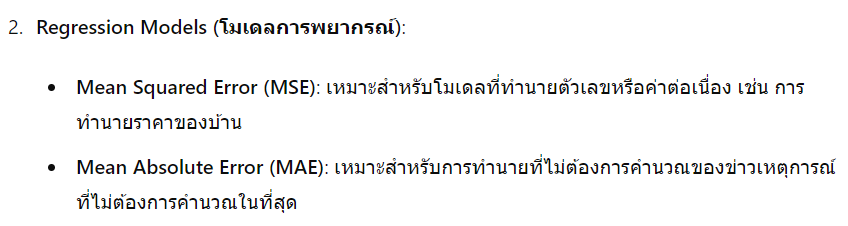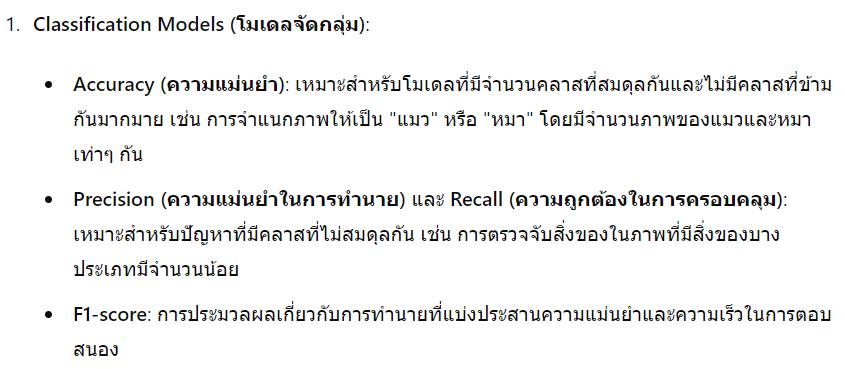

In [ ]:
#training >> model เริ่ม train
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 106s 68ms/step - loss: 0.1960 - accuracy: 0.9329 - val_loss: 1.3843 - val_accuracy: 0.6921
Epoch 2/10
1563/1563 [==============================] - 85s 55ms/step - loss: 0.1572 - accuracy: 0.9453 - val_loss: 1.5114 - val_accuracy: 0.6981
Epoch 3/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.1385 - accuracy: 0.9514 - val_loss: 1.6554 - val_accuracy: 0.6861
Epoch 4/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.1164 - accuracy: 0.9593 - val_loss: 1.6583 - val_accuracy: 0.6952
Epoch 5/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.0975 - accuracy: 0.9658 - val_loss: 1.7985 - val_accuracy: 0.6858
Epoch 6/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.1031 - accuracy: 0.9648 - val_loss: 1.9825 - val_accuracy: 0.6898
Epoch 7/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.0844 - accuracy: 0.9719 - val_loss: 2.0469 

จากคำสั่งข้างบน เราแบ่งข้อมูลในการ training เป็น 10 รอบ (epochs) โดยในแต่ละรอบจะใช้ข้อมูลทั้งหมดที่มีจากตัวแปร train_images และ train_labels สำหรับการ validate ผลเราจะใช้ข้อมูล test

ทั้งนี้เราสามารถกำหนดให้การ training หยุดลงก่อนถึง 10 รอบ หาก metric ตรงกับค่าที่เราต้องการ เทคนิคยังนี้ช่วยให้ model ไม่ overfit กับตัวอย่างข้อมูลมากเกินไปด้วย เทคนิคนี้อาศัย callbacks จาก EarlyStopping เข้ามาช่วย

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor  ='val_loss', patience=2)

model.fitin_train(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels), callbacks=[early_stop])

ตัวอย่างข้างบน เรากำหนดให้ model คอย monitor ค่า loss จาก validation data แล้วถ้าค่า loss ในรอบการ training ไม่ลดลงหรือมีค่าเพิ่มขึ้น ให้หยุดการ training
- ค่า patience = 2 หมายถึงให้หยุดเมื่อค่า loss เพิ่มขึ้น 2 รอบ (epochs) แล้ว

# Model Evaluation (การประเมินผลโมเดล)

In [ ]:
#ดูผลการรันย้อนหลังด้วยคำสั่ง history โดยคำสั่งนี้จะแสดง metrics ในทุกรอบการรัน
import pandas as pd

metrics = pd.DataFrame(model.history.history) #metrics คือ Pandas DataFrame
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.195980,0.93288,1.384303,0.6921
1,0.157164,0.94530,1.511401,0.6981
2,0.138487,0.95136,1.655401,0.6861
3,0.116371,0.95926,1.658327,0.6952
4,0.097524,0.96584,1.798541,0.6858
5,0.103146,0.96478,1.982502,0.6898
6,0.084443,0.97186,2.046870,0.6965
7,0.083739,0.97030,2.129963,0.6940
8,0.082438,0.97184,2.172081,0.6831
9,0.069583,0.97706,2.304043,0.6806


In [ ]:
print(metrics.columns)

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')


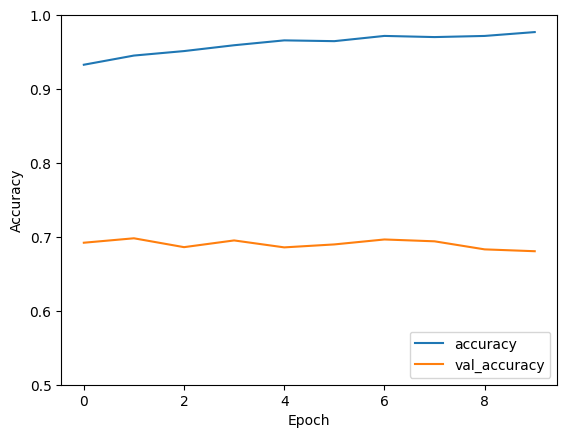

In [ ]:
# plot graph ของ metrics
#Sol1
plt.plot(history.history['accuracy'], label='accuracy')             #สร้างเส้นกราฟเพื่อแสดง accuracy ของชุดข้อมูลฝึกตาม epoch ที่ฝึก
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')   #สร้างเส้นกราฟเพื่อแสดง accuracy ของชุดข้อมูลทดสอบตาม epoch ที่ฝึก
plt.xlabel('Epoch'), plt.ylabel('Accuracy')   #ตั้งชื่อแกน X เป็น "Epoch", แกน Y เป็น "Accuracy"
plt.ylim([0.5, 1])    #กำหนดช่วงของแกน Y เริ่มต้นที่ 0.5 ถึง 1 เพื่อให้กราฟแสดงผลได้ชัดเจน
plt.legend(loc='lower right')   #แสดงคำอธิบายของกราฟที่ตำแหน่ง lower right เพื่อบอกว่าเส้นกราฟที่ไหนคือ accuracy ของชุดฝึกและชุดทดสอบ

<Axes: >

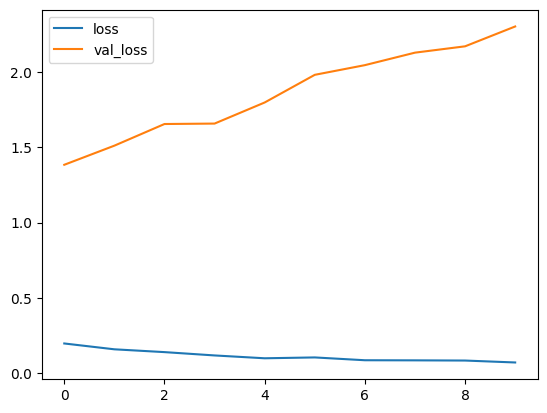

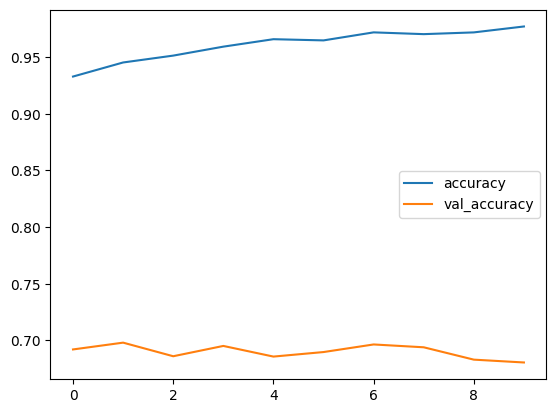

In [ ]:
#Sol2 ; use with pd - DataFrame (: Array 2D)
metrics[['loss', 'val_loss']].plot()
metrics[['accuracy', 'val_accuracy']].plot()

ถ้า loss ของชุดข้อมูล train ยังคงลดลง แต่ค่า loss ของชุดข้อมูล test เริ่มเพิ่มขึ้น หากเรายัง train model ต่อไปก็อาจทำให้ model ของเราเกิด overfit ขึ้นได้ ดังนั้นการหยุด train model จึงช่วยให้ model ไม่เกิด overfit เกินไป

In [ ]:
#หาค่าตัววัด model : evaluate function : ใช้สำหรับการประเมินประสิทธิภาพของโมเดลที่ฝึก (trained model) ด้วยข้อมูลทดสอบ (test data) โดยรับข้อมูล input และ output ที่เตรียมไว้ให้เพื่อทำการประเมิน
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

#verbose ใช้เพื่อกำหนดว่าจะแสดงข้อความอะไรบ้างในระหว่างการประเมินผลของโมเดล โดยมีค่าที่สามารถกำหนดได้ดังนี้
      #1. verbose = 0: ไม่แสดงข้อความใดๆ ในระหว่างการประเมิน
      #2. verbose = 1: แสดง progress bar ของการประเมิน
      #3. verbose = 2: แสดงผลลัพธ์ของการประเมิน (เช่น loss และ metrics) ที่สมบูรณ์ทั้งหมดหลังจากที่คำนวณเสร็จสิ้น

313/313 - 4s - loss: 2.3040 - accuracy: 0.6806 - 4s/epoch - 11ms/step


In [ ]:
#สามารถ report โดยใช้ classification_report จาก sklearn
from sklearn.metrics import classification_report

# ทำนายค่าความน่าจะเป็นของแต่ละคลาส
predictions = model.predict(test_images)
# หาคลาสที่มีความน่าจะเป็นสูงสุด
predicted_classes = np.argmax(predictions, axis=1)
# พิมพ์รายงานการจำแนกประเภท
print(classification_report(test_labels, predicted_classes))

313/313 [==============================] - 9s 29ms/step
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      1000
           1       0.81      0.77      0.79      1000
           2       0.57      0.59      0.58      1000
           3       0.49      0.51      0.50      1000
           4       0.56      0.71      0.63      1000
           5       0.63      0.53      0.58      1000
           6       0.76      0.76      0.76      1000
           7       0.71      0.75      0.73      1000
           8       0.85      0.76      0.80      1000
           9       0.79      0.71      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [ ]:
#เรียกดู confusion matrix
from sklearn.metrics import confusion_matrix

# ทำนายค่าความน่าจะเป็นของแต่ละคลาส
predictions = model.predict(test_images)
# หาคลาสที่มีความน่าจะเป็นสูงสุด
predicted_classes = np.argmax(predictions, axis=1)
# สร้าง confusion matrix
con_matrix = confusion_matrix(test_labels, predicted_classes)
print(con_matrix)

313/313 [==============================] - 6s 18ms/step
[[705  17  81  31  42  11   9  22  51  31]
 [ 26 772  24  17  13   7  14  10  24  93]
 [ 55   7 593  66 119  48  65  34   6   7]
 [ 20   6  78 508 109 138  62  57   8  14]
 [ 15   6  73  61 715  22  44  55   8   1]
 [  9   2  62 213  82 534  28  63   4   3]
 [  6   7  48  71  63  20 760  13  10   2]
 [ 11   5  36  36 102  45   4 749   1  11]
 [ 89  31  33  22  22   9   7   7 756  24]
 [ 43  95  20  21  15  16  11  39  26 714]]


In [ ]:
print(test_acc)   #CNN has achieved a test accuracy 68%

0.6805999875068665


# การนำโมเดลไปใช้งาน

 train model ของเราเรียบร้อยแล้ว เราสามารถนำ model ไปใช้ทำนายภาพใหม่ๆได้แล้ว

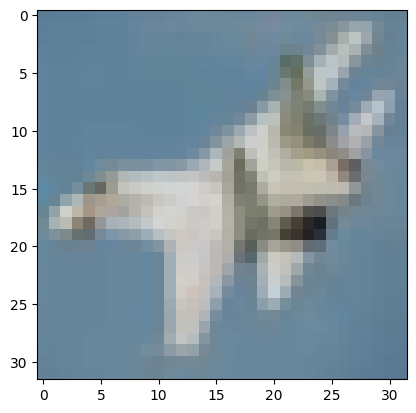

In [ ]:
from tensorflow.keras.datasets import cifar10

(in_train, out_train), (in_test, out_test) = cifar10.load_data()
my_image = in_test[10]
plt.imshow(my_image)

In [ ]:
#คำสั่งที่ใช้ทำนายผลคือ predict_classes

#ต้องเปลี่ยนรูปแบบเพื่อให้ตรงกับรูปแบบข้อมูลที่โมเดลต้องการ เช่น การ reshape สำหรับข้อมูลภาพหนึ่งภาพขนาด 32x32 และ 3 channels (RGB)
prediction = model.predict(my_image.reshape(1, 32, 32, 3))
#ค้นหา index ของคลาสที่มีความน่าจะเป็นสูงสุด
predicted_class = np.argmax(prediction, axis=1)
print("Predicted class:", prediction[0])

1/1 [==============================] - 1s 699ms/step
Predicted class: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


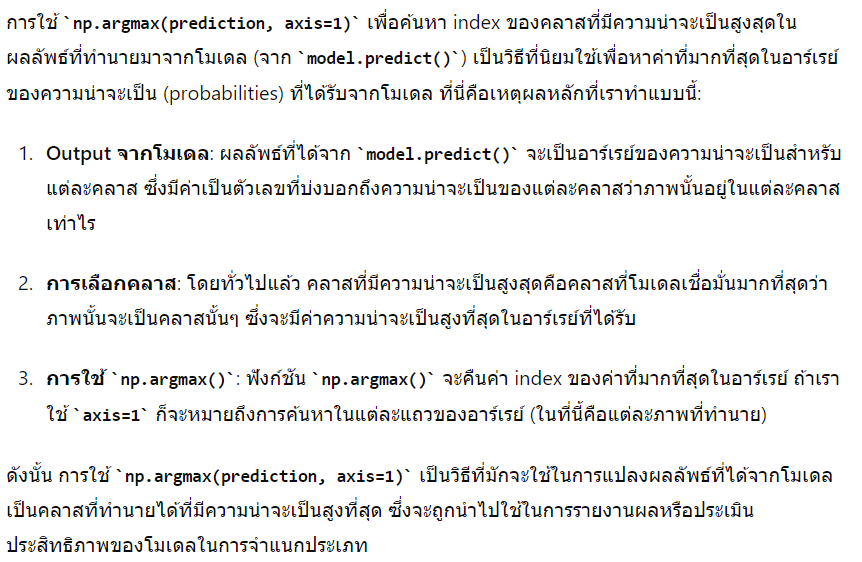